In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/owid-co2-data.csv')

In [ ]:
df.shape

(46523, 74)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [ ]:
df_for_yw = df[ ['country', 'year','co2'] ]
df_for_yw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  46523 non-null  object 
 1   year     46523 non-null  int64  
 2   co2      31349 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
df_yw_clean = df_for_yw.dropna()
df_yw_clean.shape

(31349, 3)

In [ ]:
df_yw_clean

,country,year,co2
99,Afghanistan,1949,0.015
100,Afghanistan,1950,0.084
101,Afghanistan,1951,0.092
102,Afghanistan,1952,0.092
103,Afghanistan,1953,0.106
...,...,...,...
46518,Zimbabwe,2017,9.596
46519,Zimbabwe,2018,11.795
46520,Zimbabwe,2019,11.115
46521,Zimbabwe,2020,10.608


In [ ]:
df_yw_clean.reset_index(inplace=True)

In [ ]:
df_yw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    31349 non-null  int64  
 1   country  31349 non-null  object 
 2   year     31349 non-null  int64  
 3   co2      31349 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 979.8+ KB


In [ ]:
df_yw_clean.drop('index',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df_yw_clean.isna().sum()

country    0
year       0
co2        0
dtype: int64

In [ ]:
df_yw_clean.year.min()

1750

In [ ]:
df_yw_clean.year.max()

2021

In [ ]:
df_yw_clean.co2.min()

0.0

In [ ]:
df_yw_clean.co2.max()

37123.852

In [ ]:
df_yw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  31349 non-null  object 
 1   year     31349 non-null  int64  
 2   co2      31349 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 734.9+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


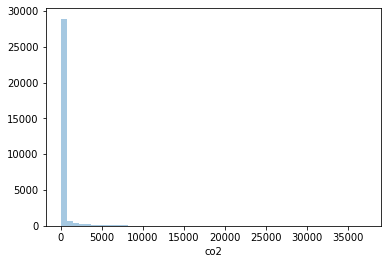

In [ ]:
sns.distplot(df_yw_clean['co2'],kde=False)
plt.show()

In [ ]:
df_yw_clean.groupby('country')['co2'].sum().sort_values(ascending=False)

country
World                    1736930.030
High-income countries     979685.131
OECD (GCP)                956343.924
Non-OECD (GCP)            732960.923
Asia                      557596.539
                            ...     
Niue                           0.305
Tuvalu                         0.283
Puerto Rico                    0.209
Leeward Islands (GCP)          0.179
Antarctica                     0.157
Name: co2, Length: 258, dtype: float64

In [ ]:
df_yw_clean.groupby('country')['co2'].sum().sort_values(ascending=False)[:20]

country
World                            1736930.030
High-income countries             979685.131
OECD (GCP)                        956343.924
Non-OECD (GCP)                    732960.923
Asia                              557596.539
Europe                            537244.203
Europe (GCP)                      532852.249
Upper-middle-income countries     524243.919
Asia (GCP)                        485793.781
North America                     484214.704
North America (GCP)               476476.505
United States                     421906.853
European Union (28)               371700.364
European Union (27)               293191.644
European Union (27) (GCP)         292381.492
Asia (excl. China and India)      251138.339
China                             249352.817
Europe (excl. EU-27)              244052.552
Lower-middle-income countries     171724.875
Europe (excl. EU-28)              165543.830
Name: co2, dtype: float64

Text(0, 0.5, 'CO2 Emissions in Ton')

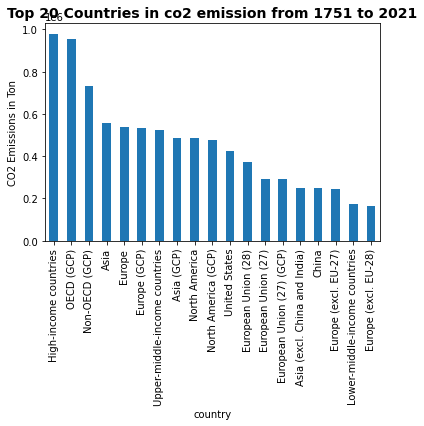

In [ ]:
df_yw_clean.groupby('country')['co2'].sum().sort_values(ascending=False)[1:20].plot(kind='bar')
plt.title('Top 20 Countries in co2 emission from 1751 to 2021',fontweight='bold',fontsize=14)
plt.ylabel('CO2 Emissions in Ton')

# Now we will classify our data into time periods and analyze each one of them
- Period1 smaller than or equal 1800 ( from 1751 to 1800)
- Period2 smaller than or equal 1850 and greater than 1800 ( 1801 to 1850)
- Period3 smaller than or equal 1900 and greater than 1850 ( 1851 to 1900)
- Period4 smaller than or equal 1950 and greater than 1900 ( 1901 to 1950)
- Period5 smaller than or equal 2000 and greater than 1950 ( 1951 to 2000)
- Period6 greater than 2000

In [ ]:
p1_c1=df_yw_clean['year']<=1800

In [ ]:
period1=df_yw_clean[p1_c1]

In [ ]:
p2_c1=df_yw_clean['year']<=1850
p2_c2=df_yw_clean['year']>1800

In [ ]:
period2=df_yw_clean[p2_c1&p2_c2]

In [ ]:
p3_c1=df_yw_clean['year']<=1900
p3_c2=df_yw_clean['year']>1850

In [ ]:
period3=df_yw_clean[p3_c1&p3_c2]

In [ ]:
p4_c1=df_yw_clean['year']<=1950
p4_c2=df_yw_clean['year']>1900

In [ ]:
period4=df_yw_clean[p4_c1&p4_c2]

In [ ]:
p5_c1=df_yw_clean['year']<=2000
p5_c2=df_yw_clean['year']>1950

In [ ]:
period5=df_yw_clean[p5_c1&p5_c2]

In [ ]:
p6_c1=df_yw_clean['year']>2000

In [ ]:
period6=df_yw_clean[p6_c1]

# Now let's see Co2 emissions in each period grouped by country
Period 1 from year 1751 to 1800

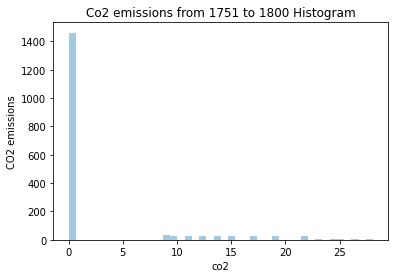

In [ ]:
sns.distplot(period1['co2'],kde=False).set_title('Co2 emissions from 1751 to 1800 Histogram')
plt.ylabel('CO2 emissions')
plt.show()

In [ ]:
period1.groupby('country')['co2'].sum().sort_values(ascending=False)

country
World                            781.509
High-income countries            781.509
Europe                           781.199
European Union (28)              781.199
United Kingdom                   775.871
Europe (excl. EU-27)             775.871
European Union (27)                5.328
Germany                            4.921
Poland                             0.407
North America                      0.316
United States                      0.253
North America (excl. USA)          0.064
Canada                             0.064
Oceania                            0.000
Papua New Guinea                   0.000
Sierra Leone                       0.000
Reunion                            0.000
Mauritania                         0.000
Singapore                          0.000
South America                      0.000
Tuvalu                             0.000
Upper-middle-income countries      0.000
Mayotte                            0.000
Africa                             0.000
Martiniq

Text(0.5, 1.0, 'Co2 emissions from year 1751 to 1800 by country')

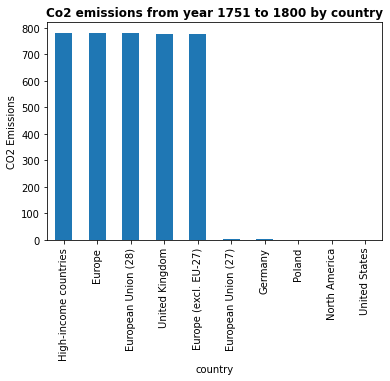

In [ ]:
period1.groupby('country')['co2'].sum().sort_values(ascending=False)[1:11].plot(kind='bar')
plt.ylabel('CO2 Emissions')
plt.title('Co2 emissions from year 1751 to 1800 by country',fontweight='bold')

In [ ]:
co2_1751_to1800=period1['co2'].sum()
period1['co2'].sum()

4688.511

Period 2 from 1801 to 1850

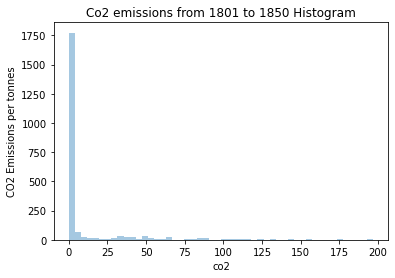

In [ ]:
sns.distplot(period2['co2'],kde=False).set_title('Co2 emissions from 1801 to 1850 Histogram')
plt.ylabel('CO2 Emissions per tonnes')
plt.show()

In [ ]:
period2.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21]

country
High-income countries        3977.718
Europe                       3787.788
European Union (28)          3786.475
Europe (excl. EU-27)         2928.767
United Kingdom               2927.455
European Union (27)           859.019
France                        340.422
Germany                       249.733
OECD (GCP)                    196.784
North America                 190.093
United States                 189.718
Europe (GCP)                  177.030
Belgium                       150.497
Poland                         62.956
European Union (27) (GCP)      54.190
Austria                        30.649
North America (GCP)            19.852
Netherlands                    16.854
Spain                           2.745
Denmark                         1.825
Name: co2, dtype: float64

Text(0, 0.5, 'CO2 Emissions in tonnes')

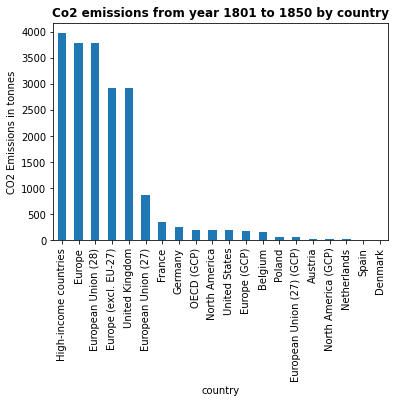

In [ ]:
period2.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21].plot(kind='bar')
plt.title('Co2 emissions from year 1801 to 1850 by country',fontweight='bold')
plt.ylabel('CO2 Emissions in tonnes')

In [ ]:
co2_1801_to1850=period2['co2'].sum()
period2['co2'].sum()

23935.585

Period 3 from 1851 to 1900

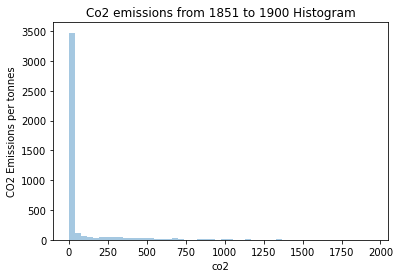

In [ ]:
sns.distplot(period3['co2'],kde=False).set_title('Co2 emissions from 1851 to 1900 Histogram')
plt.ylabel('CO2 Emissions per tonnes')
plt.show()

In [ ]:
period3.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21]

country
OECD (GCP)                       39081.454
High-income countries            39078.294
Europe (GCP)                     28691.009
Europe                           28691.008
European Union (28)              27881.248
European Union (27) (GCP)        14841.062
European Union (27)              14841.062
Europe (excl. EU-27)             13849.939
United Kingdom                   13040.185
North America                    10761.820
North America (GCP)              10761.820
United States                    10474.478
Germany                           6136.201
France                            3370.042
Belgium                           1357.425
Poland                            1271.987
Non-OECD (GCP)                     980.314
Europe (excl. EU-28)               809.756
Upper-middle-income countries      678.195
Czechia                            638.151
Name: co2, dtype: float64

Text(0.5, 1.0, 'Co2 emissions from 1851 to 1900 per country')

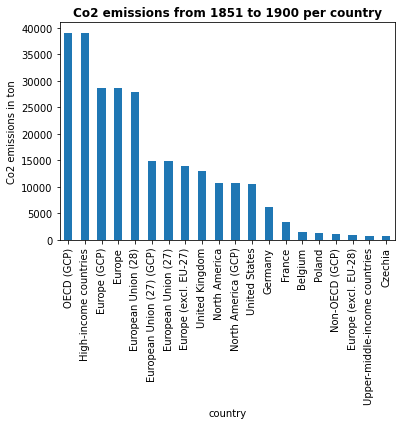

In [ ]:
period3.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21].plot(kind='bar')
plt.ylabel('Co2 emissions in ton')
plt.title('Co2 emissions from 1851 to 1900 per country',fontweight='bold')

In [ ]:
co2_1851_to1900=period3['co2'].sum()
period3['co2'].sum()

313185.86399999994

Period 4 from 1901 to 1950

In [ ]:
period4.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21]

country
OECD (GCP)                       164644.655
High-income countries            164098.888
North America                     87064.368
North America (GCP)               86787.599
Europe (GCP)                      81849.925
Europe                            81849.924
United States                     81323.379
European Union (28)               72354.273
European Union (27) (GCP)         49938.407
European Union (27)               49938.407
Europe (excl. EU-27)              31911.520
Germany                           22799.843
United Kingdom                    22415.866
Non-OECD (GCP)                    21123.353
Upper-middle-income countries     14996.032
Asia                              12071.138
Asia (GCP)                        10614.244
Europe (excl. EU-28)               9495.654
France                             8173.868
Asia (excl. China and India)       7916.252
Name: co2, dtype: float64

Text(0, 0.5, 'CO2 Emissions in tonnes')

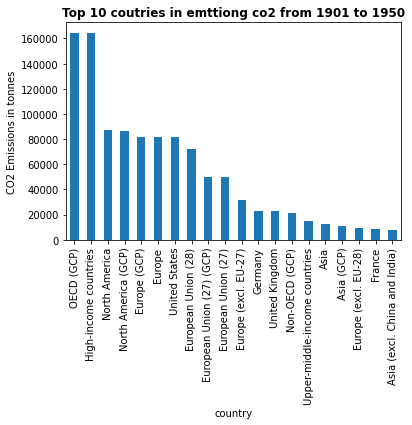

In [ ]:
period4.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21].plot(kind='bar')
plt.title('Top 10 coutries in emttiong co2 from 1901 to 1950',fontweight='bold')
plt.ylabel('CO2 Emissions in tonnes')

In [ ]:
co2_1901_to1950=period4['co2'].sum()
period4['co2'].sum()

1341830.3939999999

Period 5 from 1951 to 2000

In [ ]:
period5.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21]

country
High-income countries            485360.875
OECD (GCP)                       478741.603
Non-OECD (GCP)                   315638.194
Europe                           297273.172
Europe (GCP)                     297273.172
North America                    243505.665
North America (GCP)              239761.629
Upper-middle-income countries    227874.910
United States                    212407.277
Asia                             200187.370
European Union (28)              186962.657
Asia (GCP)                       174571.516
European Union (27) (GCP)        157645.694
European Union (27)              157645.691
Europe (excl. EU-27)             139627.485
Europe (excl. EU-28)             110310.512
Asia (excl. China and India)     109843.631
Russia                            76845.068
China                             73421.068
Lower-middle-income countries     70637.013
Name: co2, dtype: float64

Text(0, 0.5, 'CO2 Emissions in tonnes')

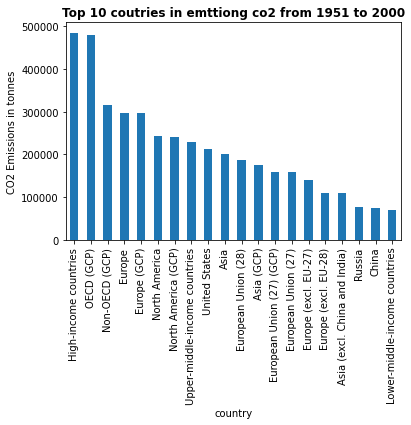

In [ ]:
period5.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21].plot(kind='bar')
plt.title('Top 10 coutries in emttiong co2 from 1951 to 2000',fontweight='bold')
plt.ylabel('CO2 Emissions in tonnes')

In [ ]:
co2_1951_to2000=period5['co2'].sum()
period5['co2'].sum()

5696913.524

Period 6 from 2000 to 2017

In [ ]:
period6.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21]

country
Non-OECD (GCP)                   395218.950
Asia                             344918.150
Asia (GCP)                       300199.218
High-income countries            286387.847
Upper-middle-income countries    280694.643
OECD (GCP)                       273679.428
China                            173660.590
North America                    142692.442
North America (GCP)              139145.605
Asia (excl. China and India)     133073.581
Europe (GCP)                     124861.113
Europe                           124861.112
United States                    117511.748
Lower-middle-income countries     94606.839
European Union (28)               79934.512
European Union (27) (GCP)         69902.139
European Union (27)               69902.137
Europe (excl. EU-27)              54958.970
Europe (excl. EU-28)              44926.597
Middle East (GCP)                 44837.743
Name: co2, dtype: float64

Text(0, 0.5, 'CO2 Emissions in tonnes')

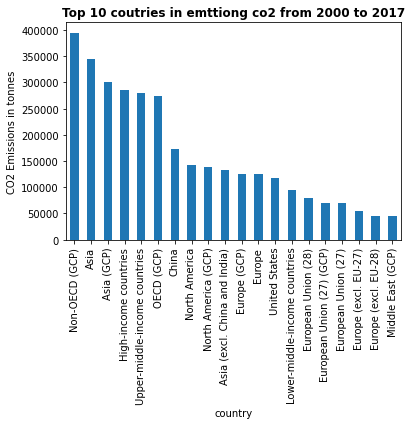

In [ ]:
period6.groupby('country')['co2'].sum().sort_values(ascending=False)[1:21].plot(kind='bar')
plt.title('Top 10 coutries in emttiong co2 from 2000 to 2017',fontweight='bold')
plt.ylabel('CO2 Emissions in tonnes')

In [ ]:
co2_2000_to2017=period6['co2'].sum()
period6['co2'].sum()

4531692.638

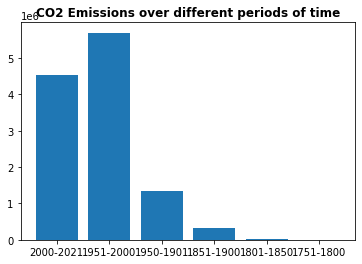

In [ ]:
plt.bar([1,2,3,4,5,6],[co2_2000_to2017,co2_1951_to2000,co2_1901_to1950,co2_1851_to1900,co2_1801_to1850,co2_1751_to1800]
       ,tick_label=['2000-2021','1951-2000','1950-1901','1851-1900','1801-1850','1751-1800'])
plt.xlabel=('Time Frames')
plt.ylabel=('CO2 Emissions in ton')
plt.title('CO2 Emissions over different periods of time',fontweight='bold')
plt.show()